In [1]:
import seaborn as sns
import scipy as sp
import scipy.stats

import numpy as np
import pandas as pd

# import pandas_datareader.data as web
#시각화 패키지
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin': rc('font', family='AppleGothic')

import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False

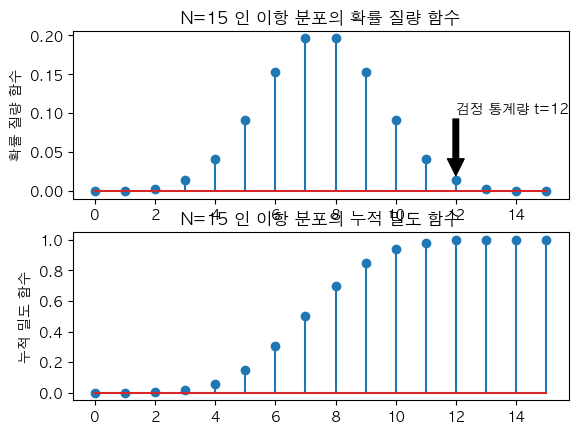

0.03515625


In [16]:
# 시행 횟수
N = 15
# 앞면이 나올 확률
mu = 0.5

rv = sp.stats.binom(N, mu)

xx = np.arange(N+1)

# 확률 질량 함수 (각각이 나올 수 있는 확률에 대한 함수를 출력)
plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel('확률 질량 함수')
plt.title('N=15 인 이항 분포의 확률 질량 함수')
plt.annotate('검정 통계량 t=12', xy=(12, 0.02), xytext=(12, 0.1), arrowprops={'facecolor':'black'})

plt.subplot(212)
plt.stem(xx, rv.cdf(xx))
plt.ylabel('누적 밀도 함수')
plt.title('N=15 인 이항 분포의 누적 밀도 함수')

plt.show()

print(2 * (1 - rv.cdf(12-1))) # 0.035

# 유의 수준을 5%로 설정한 경우 유의 확률이 유의 수준보다 낮기 때문에 귀무 가설을 기각한다.
# 이 동전은 공정하지 않다.

In [20]:
item = pd.read_csv('../data/tdata.csv', encoding='cp949')
print(item)

# 성적의 평균이 75라고 했을 때의 유의 확률
result = sp.stats.ttest_1samp(item['성적'], popmean=75).pvalue

if result >= 0.05:
    print('유의 확률이 유의 가설보다 확률이 크므로 귀무 가설 채택', result)
else:
    print('유의 확률이 유의 가상보다 혹률이 작으므로 귀무 가설 실패')


   번호  성적
0   1  77
1   2  85
2   3  63
3   4  69
4   5  82
5   6  78
6   7  73
7   8  87
8   9  65
9  10  92
유의 확률이 유의 가설보다 확률이 크므로 귀무 가설 채택 0.5079049500571382


[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
[ 1.94043571 15.04273507  8.11037725  1.71675016  4.93863233  3.83674327
 15.44079073 -1.55158264  3.63067702 -8.04095739]


/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_2683/1224029993.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이의 집합')
/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_2683/1224029993.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

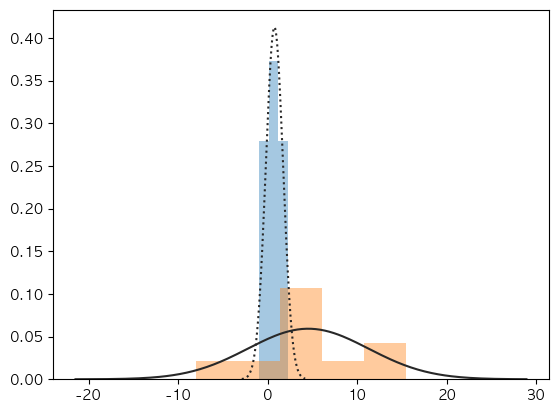

TtestResult(statistic=-1.6617909457398812, pvalue=0.1295818556753031, df=9.371078280731654)


In [32]:
# 제 2종 오류가 발생
# 첫 번째 데이터 집단
N_1 = 10
mu_1 = 0
sigma_1 = 1

N_2 = 10
mu_2 = 0.5
sigma_2 = 10

np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

print(x1)
print(x2)

ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이의 집합')
ax = sns.distplot(x2, kde=False, fit = sp.stats.norm, label='2번 데이의 집합')
ax.lines[0].set_linestyle(':')
plt.show()

print(sp.stats.ttest_ind(x1, x2, equal_var=False))
# 유의 수준이 알마로 지정하더라도 귀무 가설을 기각할 순 없음.
# 분명히 평균이 0과 0.5로 다른데도 두 집단의 ㅍ평균이 같다라는 유의 확률이 0.684가 된다.
# 귀무 가설이 거짓인데 참이라 나옴.
# 이런 경우 2종 오류라고 하며 원인은 대부분 ㄷ데이터 갯수의 문제

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
[ 1.94043571 15.04273507  8.11037725  1.71675016  4.93863233  3.83674327
 15.44079073 -1.55158264  3.63067702 -8.04095739]


/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_2683/1224029993.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이의 집합')
/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_2683/1224029993.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

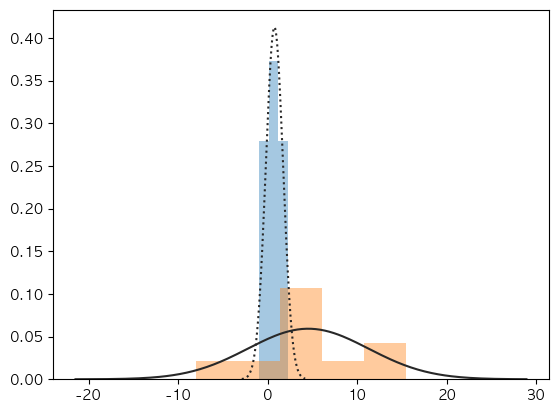

TtestResult(statistic=-1.6617909457398812, pvalue=0.1295818556753031, df=9.371078280731654)


In [33]:
# 제 2종 오류가 발생
# 첫 번째 데이터 집단
N_1 = 10
mu_1 = 0
sigma_1 = 1

N_2 = 10
mu_2 = 0.5
sigma_2 = 10

np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

print(x1)
print(x2)

ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이의 집합')
ax = sns.distplot(x2, kde=False, fit = sp.stats.norm, label='2번 데이의 집합')
ax.lines[0].set_linestyle(':')
plt.show()

print(sp.stats.ttest_ind(x1, x2, equal_var=False))
# 유의 수준이 알마로 지정하더라도 귀무 가설을 기각할 순 없음.
# 분명히 평균이 0과 0.5로 다른데도 두 집단의 ㅍ평균이 같다라는 유의 확률이 0.684가 된다.
# 귀무 가설이 거짓인데 참이라 나옴.
# 이런 경우 2종 오류라고 하며 원인은 대부분 ㄷ데이터 갯수의 문제

[ 1.76405235e+00  4.00157208e-01  9.78737984e-01  2.24089320e+00
  1.86755799e+00 -9.77277880e-01  9.50088418e-01 -1.51357208e-01
 -1.03218852e-01  4.10598502e-01  1.44043571e-01  1.45427351e+00
  7.61037725e-01  1.21675016e-01  4.43863233e-01  3.33674327e-01
  1.49407907e+00 -2.05158264e-01  3.13067702e-01 -8.54095739e-01
 -2.55298982e+00  6.53618595e-01  8.64436199e-01 -7.42165020e-01
  2.26975462e+00 -1.45436567e+00  4.57585173e-02 -1.87183850e-01
  1.53277921e+00  1.46935877e+00  1.54947426e-01  3.78162520e-01
 -8.87785748e-01 -1.98079647e+00 -3.47912149e-01  1.56348969e-01
  1.23029068e+00  1.20237985e+00 -3.87326817e-01 -3.02302751e-01
 -1.04855297e+00 -1.42001794e+00 -1.70627019e+00  1.95077540e+00
 -5.09652182e-01 -4.38074302e-01 -1.25279536e+00  7.77490356e-01
 -1.61389785e+00 -2.12740280e-01 -8.95466561e-01  3.86902498e-01
 -5.10805138e-01 -1.18063218e+00 -2.81822283e-02  4.28331871e-01
  6.65172224e-02  3.02471898e-01 -6.34322094e-01 -3.62741166e-01
 -6.72460448e-01 -3.59553

/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_2683/4043318978.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이의 집합')
/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_2683/4043318978.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

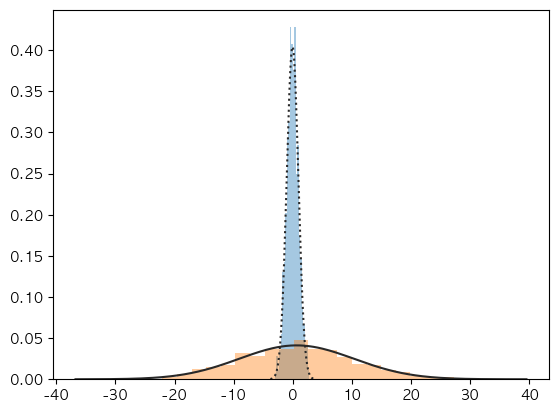

TtestResult(statistic=-2.213140962640417, pvalue=0.02710871858737148, df=1019.7643241032847)


In [36]:
# 제 2종 오류가 발생
# 첫 번째 데이터 집단
N_1 = 1000
mu_1 = 0
sigma_1 = 1

N_2 = 1000
mu_2 = 0.5
sigma_2 = 10

np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

print(x1)
print(x2)

ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이의 집합')
ax = sns.distplot(x2, kde=False, fit = sp.stats.norm, label='2번 데이의 집합')
ax.lines[0].set_linestyle(':')
plt.show()

print(sp.stats.ttest_ind(x1, x2, equal_var=False))
# 유의 수준이 알마로 지정하더라도 귀무 가설을 기각할 순 없음.
# 분명히 평균이 0과 0.5로 다른데도 두 집단의 ㅍ평균이 같다라는 유의 확률이 0.684가 된다.
# 귀무 가설이 거짓인데 참이라 나옴.
# 이런 경우 2종 오류라고 하며 원인은 대부분 ㄷ데이터 갯수의 문제


# 2종 오류 해결.
# 시행횟수를 늘렷 중심극한의 저이에 맞도록

In [38]:
# 서로 다른 수면제를 복용한 경우 약의 효과가 다른지 여부를 판단.
# p-value가 0.05 보다 크면 귀무 가설 채택 - 2개의 평균은 같다.
# p-value가 0.05 보다 작으면 귀무 가설 기갈 - 2개의 평균은 다르다.

x1 = np.array([0,5, 1, 0.95, -1.2, -1, 9, 25, 0.1, 0.124, -2])
x2 = np.array([1.2, 3.2, 0.6, 0.12, -0.2, -.3, -2, 2, 0])

r = sp.stats.ttest_ind(x1, x2, equal_var=True)

if r.pvalue >= 0.05:
    print('귀무 가설 채택')
else:
    print('귀무 가설 기각')

귀무 가설 채택


In [49]:
# 서로 다른 수면제를 복용한 경우 약의 효과가 다른지 여부를 판단.
# p-value가 0.05 보다 크면 귀무 가설 채택 - 2개의 평균은 같다.
# p-value가 0.05 보다 작으면 귀무 가설 기갈 - 2개의 평균은 다르다.

x1 = np.array([0.5, 1.1, 0.9, -1.2, -1.1, 9.1, 2.2, 0.1, 0.1, 0.1])
x2 = np.array([1.2, 3.2, 0.6, 0.1, -0.2, -0.3, -2.3, 2.2, 0.1, 0.1])
print(x1, x2)
r = sp.stats.ttest_rel(x1, x2)

print(r)


[ 0.5  1.1  0.9 -1.2 -1.1  9.1  2.2  0.1  0.1  0.1] [ 1.2  3.2  0.6  0.1 -0.2 -0.3 -2.3  2.2  0.1  0.1]
TtestResult(statistic=0.6268258540804222, pvalue=0.5463428665650272, df=9)


In [54]:
# 윌콕슨의 부호 순위 검정
training_rel = pd.read_csv('../data/training_rel.csv')
print(training_rel.head())

toy_df = training_rel[:6].copy()

toy_df['차'] = toy_df['후'] - toy_df['전']
print(toy_df)

# 차의 절대값을 가지고 순위를 구함
toy_df['순위'] = sp.stats.rankdata(abs(toy_df['차'])).astype(int)
print(toy_df)

    전   후
0  59  41
1  52  63
2  55  68
3  61  59
4  59  84
    전   후   차
0  59  41 -18
1  52  63  11
2  55  68  13
3  61  59  -2
4  59  84  25
5  45  37  -8
    전   후   차  순위
0  59  41 -18   5
1  52  63  11   3
2  55  68  13   4
3  61  59  -2   1
4  59  84  25   6
5  45  37  -8   2


In [55]:
# 차이가 음수일 때와 양수일 때의 순윟 ㅏㅂ 구하기
r_minus = np.sum((toy_df['차'] < 0) * toy_df['순위'])
r_plus = np.sum((toy_df['차'] > 0) * toy_df['순위'])
print(r_minus, r_plus)

# 2개의 값 중 작은 쪽이 검정 통계량: 8
# 이 값과 임계값(직접 설정한 값)과 비교해서 
# 임계값보다 작은 경우에 귀무 가설이 기각되는 단측검사.

8 13


In [58]:
data = [41, 30, 51, 71, 61]
# 카이 제곱 검정을 수행
print(sp.stats.chisquare(data))

# 유의 수준을 5%로 설정하면 유의 수준이 유의 확률보다 크기 때문에
# 선호도의 차이가 있다고 해석함.
# 평균을 가지고 하는 검정과 분산을 가지고 하는 검정은 결과 해석을 반대로 한다.

Power_divergenceResult(statistic=20.488188976377952, pvalue=0.00039991784008227264)
